# **Project Proposal - Group 37**

## Group members:
- Nadia Khalil Arjomandi- Savero Lukianto Chandra - Brianna De Souza - Sophia Shengs


# Project title: Income Prediction Analysis: Determining the Likelihood of Earning Over 50,000 dollars Based on Age, Enducational Level, Capital Loss, Capital Gain, and Work Hours

# I. Introduction

The project aims to develop a predictive model/question to determine if a person earns over 50,000 dollars a year, focusing on factors such as age, capital loss, capital gain, work hours per week, and educational level. This question is relevant not only to the project but also for real-world applications in policymaking and marketing. The rationale is based on the observation that young adults with lower educational level, typically with limited disposable income and smaller investments, might have lesser capital gains or losses. In contrast, middle-aged adults with higher educational level, likely in their peak earning years, may have larger investments and a higher likelihood of exceeding the 50,000 dollars income threshold. Older adults could have diverse financial situations, some accumulating wealth and others with reduced earnings post-retirement. The "Adult" dataset from the 1994 Census, available in the UCI Machine Learning Repository, is used for this analysis. The project's main objective is to accurately identify individuals earning above $50,000 annually, distinguishing between middle and higher income groups in the U.S. This project aims to understand the determinants of financial success.

(word count = 181)

# II. Preliminary Data Analysis

### i. Installing the Required Libraries

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### ii. Reading the Dataset into R

In [2]:
# The URL that contains the data set.
url <- "https://raw.githubusercontent.com/Syzophia/dsci100-group-37-project/main/adult.data"

# Reading the data set.
adult_data <- read.csv(url) 

# Showing the first 6 rows of the raw data.
head(adult_data)

,X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


### iii. Wrangling and Cleaning Data into a Tidy Format

#### A. Giving Readable Column Names for the Data Set

In [3]:
# First, we rename the columns to improve the readability of the data frame.

# assigning column names for the data frame.
colnames (adult_data) <- c("age", "workclass", "fnlwgt", "education", "education_level", "marital_status",
                            "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                            "weekly_work_hours", "native_country", "income")
head(adult_data)

,age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


#### B. Choosing the Country to Focus on
We focus our classification project on one country, USA, because,in real life, some factors that affect one's income are country-dependent. People in different countries have different difficulties in gaining 50,000 USD.

In [4]:
# Summarize the count of each country in the data set.
list_of_countries <- adult_data |> 
            group_by(native_country) |> 
            summarize (count = n()) |> 
            arrange(-count)
# In the table below, we can see that most people reside in the US. Afterward, we only take into account the people
# whose native country is the US.
# In the table below, we also found 583 missing points for the native_country variable.
head(list_of_countries)

native_country,count
<chr>,<int>
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121


In [5]:
# Modifying the data frame so that only the data points having the US as their native country are included.
adult_data |> filter (native_country == "United-States")
head(adult_data)

age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>


,age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


#### C. Selecting Relevant Variables for the Classification Model
To perform the classification algorithm, we need to convert `income` into a `fct` data type and only select numerical variables for the predictors.

In [6]:
# Selecting the columns associated which numerical variables, continued by converting income into a factor variable.
adult_data <- adult_data |> select (age, education_level, capital_gain, capital_loss, weekly_work_hours, income) |>
                            mutate (income = as_factor(income))
head(adult_data)

,age,education_level,capital_gain,capital_loss,weekly_work_hours,income
,<int>,<int>,<int>,<int>,<int>,<fct>
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
5,37,14,0,0,40,<=50K
6,49,5,0,0,16,<=50K


Now, the data frame is tidy since it only has one variable per column, one observation per row, and one value per cell.

#### D. Splitting the Data Frame into a Training Set and a Testing Set

In [7]:
set.seed(250)
# splitting the data frame into a training set and a testing set.
# in this project, 70% data is used as the training set.
adult_split <- initial_split (adult_data, prop = 0.7, strata = income)
adult_training <- training(adult_split)
adult_testing <- testing (adult_split)

#### E. Summarizing the Key Features in the Training Data Set
1) **Number of observations and variables**

In [8]:
dimension <- tibble (dim (adult_training))
dimension
# The table shows that the training data set has 22791 rows and 6 columns.

dim(adult_training)
<int>
22791
6


2. **Average of all predictors**

In [9]:
# Select all columns in the training data set except income.
# Then, calculate the average of each predictor while removing missing data points.
pred_mean <- adult_training |> select (- income) |>
                               map_df (mean, na.rm = TRUE)
pred_mean

age,education_level,capital_gain,capital_loss,weekly_work_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38.62959,10.07718,1108.67,86.66601,40.45829


3. **Number of missing data points**

In [10]:
nas <- adult_training |> select (- income) |>
                    map_df (mean, na.rm = TRUE) |>
                    mutate(na_count = sum(is.na (adult_training)))
nas
# Apparently, there is no missing data point in our training data set.

age,education_level,capital_gain,capital_loss,weekly_work_hours,na_count
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
38.62959,10.07718,1108.67,86.66601,40.45829,0


4. **Median of all predictors**

In [11]:
# Select all columns in the training data set except income.
# Then, calculate the median of each predictor while removing missing data points.
pred_median <- adult_training |> select (- income) |>
                               map_df (median, na.rm = TRUE)
pred_median

age,education_level,capital_gain,capital_loss,weekly_work_hours
<int>,<int>,<int>,<int>,<int>
37,10,0,0,40


### iv. Visualizing Data

### A. Visualizing the distribution of age

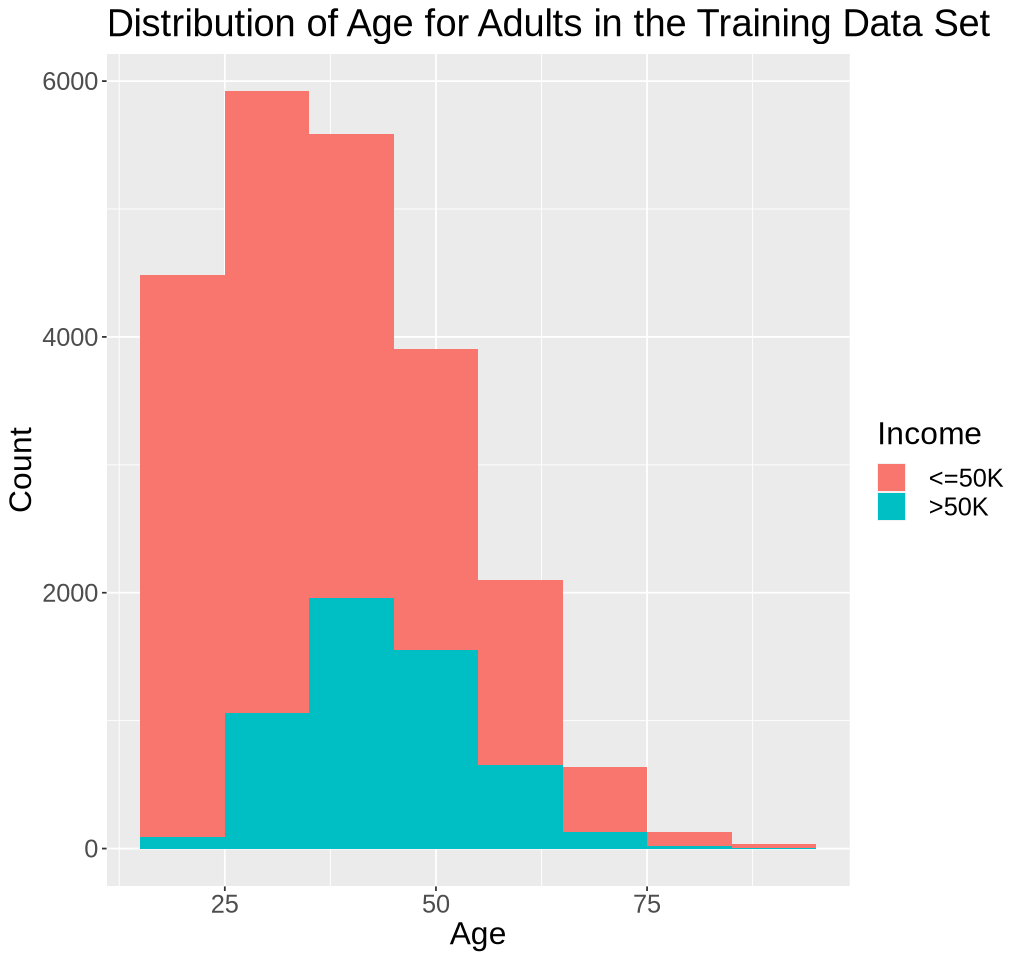

In [12]:
options(repr.plot.height = 8, repr.plot.width = 8.5)
age_histogram <- adult_training |> ggplot (aes (x = age, fill = income)) + 
              geom_histogram(binwidth = 10) + 
              labs(x = "Age", y = "Count", fill = "Income", title = "Distribution of Age for Adults in the Training Data Set") +
              theme (text = element_text (size = 19))
age_histogram

### B. Visualizing the distribution of education level

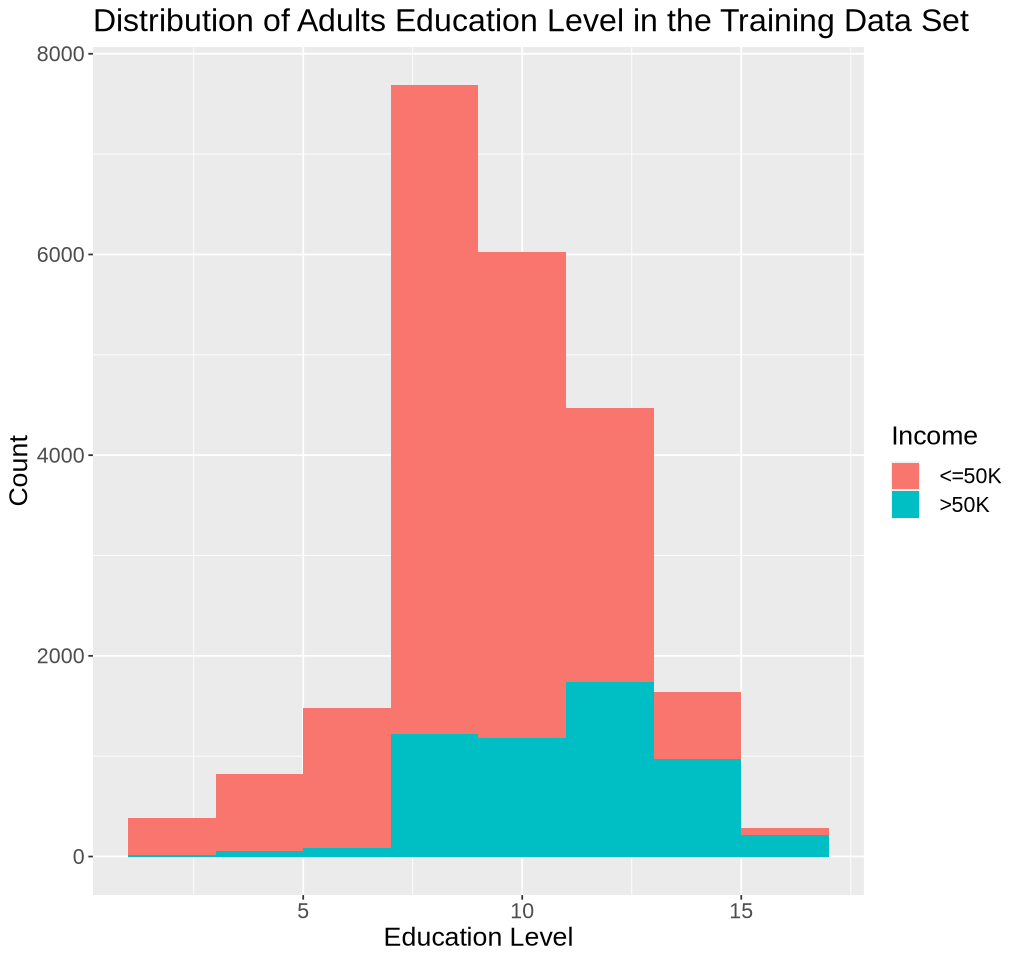

In [13]:
edu_histogram <- adult_training |> ggplot (aes (x = education_level, fill = income)) + 
              geom_histogram(binwidth = 2) + 
              labs(x = "Education Level", y = "Count", fill = "Income", title = "Distribution of Adults Education Level in the Training Data Set") +
              theme (text = element_text (size = 16))
edu_histogram

### C. Visualizing the distribution of capital gain

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 44 rows containing missing values (`geom_bar()`).”


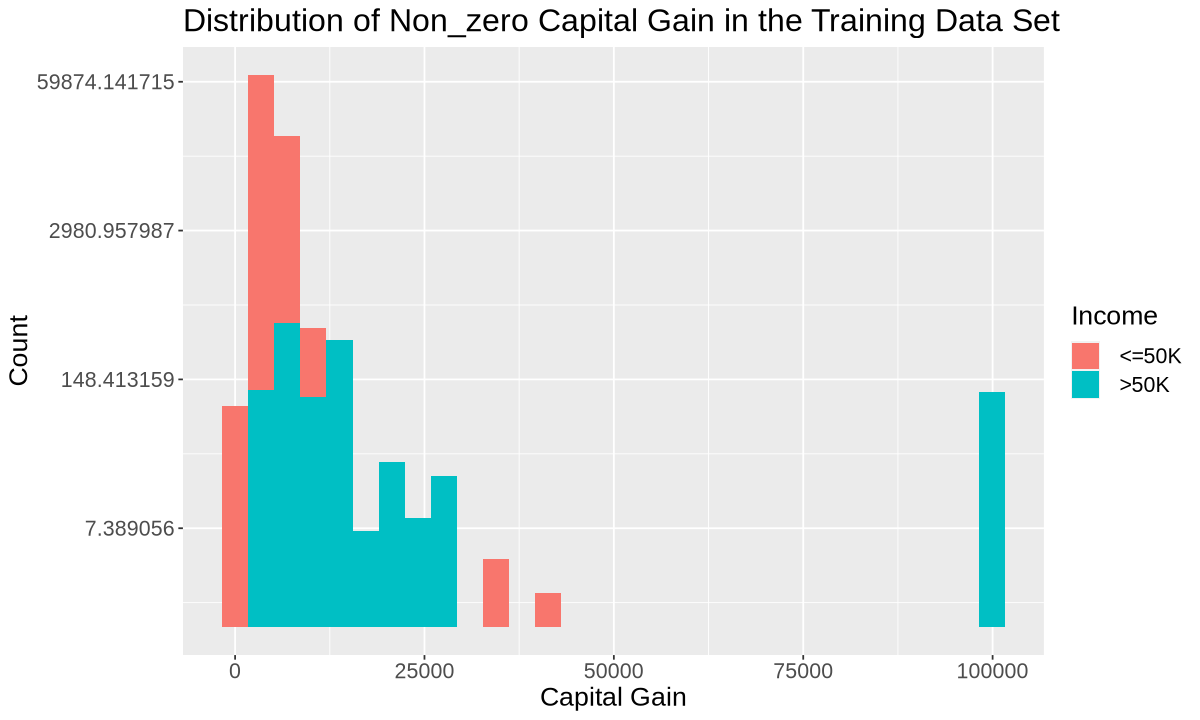

In [14]:
#Here the points of the y-axis and x_axis are far apart, and we need to zoom in on the image in the lower right corner to visualize the results.
options(repr.plot.height = 6, repr.plot.width = 10)
capital_gain_plot <- adult_training|>
      filter (capital_gain != 0)|>
      ggplot(aes(x = capital_gain, fill = income)) +
      geom_histogram() +
      labs(title = "Distribution of Non_zero Capital Gain in the Training Data Set",
           x = "Capital Gain",
           y = "Count",
           fill= "Income")+
        theme (text = element_text (size = 16))+
          scale_y_continuous(trans = 'log') 
          scale_x_continuous(trans = 'log')
capital_gain_plot 

### D. Visualizing the distribution of capital loss

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 26 rows containing missing values (`geom_bar()`).”


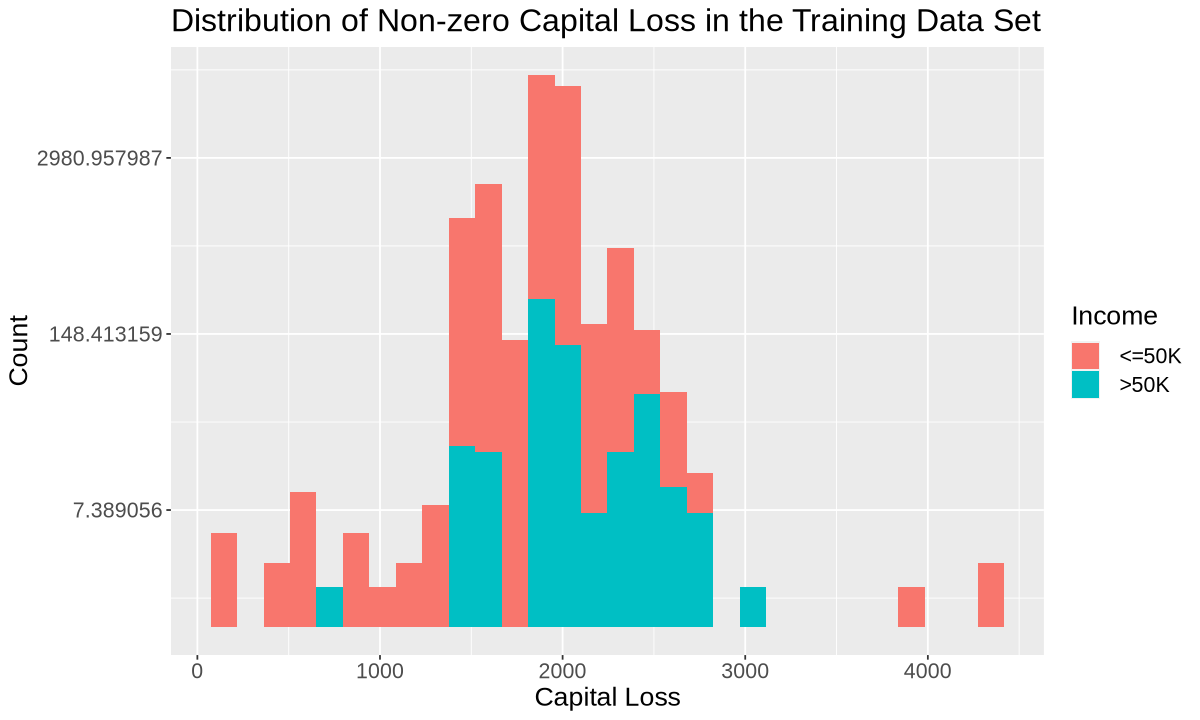

In [15]:
capital_loss_plot <- adult_training|>
      filter (capital_loss!= 0)|>
      ggplot(aes(x = capital_loss, fill = income)) +
      geom_histogram() +
      labs(title = "Distribution of Non-zero Capital Loss in the Training Data Set",
           x = "Capital Loss",
           y = "Count",
           fill= "Income")+
        theme (text = element_text (size = 16))+
          scale_y_continuous(trans = 'log') 
          scale_x_continuous(trans = 'log')
capital_loss_plot 

### E. Visualizing the distribution of weekly work hours

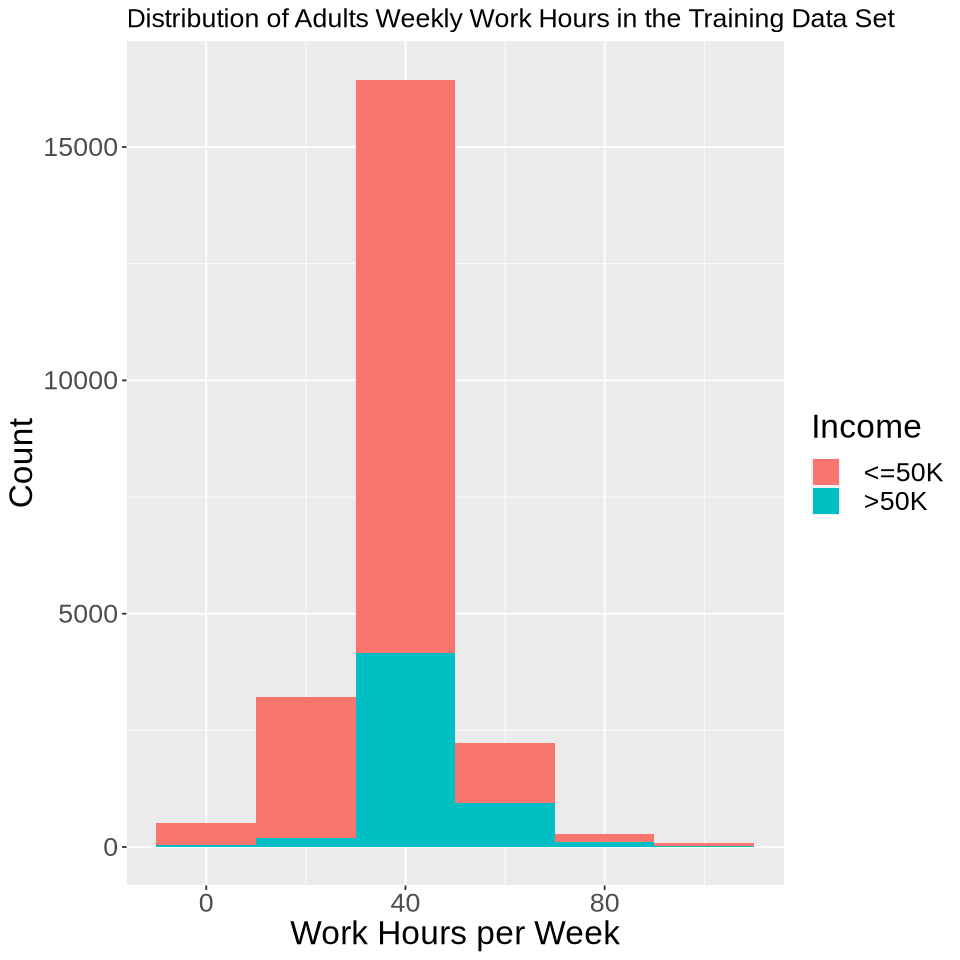

In [16]:
options(repr.plot.height = 8, repr.plot.width = 8)
weekly_work_hours_histogram <- adult_training |> 
              ggplot (aes (x = weekly_work_hours, fill = income)) + 
              geom_histogram(binwidth = 20) + 
              labs(x = "Work Hours per Week", y = "Count", fill = "Income", title = "Distribution of Adults Weekly Work Hours in the Training Data Set") +
              theme (text = element_text (size = 20),
              plot.title = element_text(size =16))
weekly_work_hours_histogram

# III. Methods

### i. Data Analysis

We create a binary classifier predicting whether one's income exceeds $ 50k by using the KNN classification. Our data set contains 15 columns, but we only select numerical parameters as the predictors.

- We use `age` as a predictor because we observed a higher prevalence of middle-aged people who earn more than  $ 50k in the exploratory data analysis, indicating the influence of age in determining one's income.
- We use `education_level`, `capital_gain`, `capital_loss`, and `weekly_work_hours` because the plots in the exploratory phase show positive relationships between each variable and `income`.

We start by dividing the data set into a training (75%) and testing set (25%) using `income` as the strata argument. Then, we use `tune()` to determine the best $K$, number of nearest neighbors. Finally, we proceed with the regular procedure in performing the KNN classification.

(word count = 133)

### ii. Data Visualization

We will visualize our result with scatterplots showing the relationships of the predictors with different colors for data points having more than 50k income and less than 50k income. Moreover, we depict $K$ versus accuracy to determine the best value of $K$ for our model.

(Word count = 45)

# IV. Expected Outcomes and Significance

Firstly, we predict that middle-aged individuals with higher education levels may have higher incomes on average, compared to younger individuals, as with more seniority, they are more likely to move up in rank within their respective positions, taking on roles with greater responsibilities, and therefore, higher salaries. Insights from this analysis could be used to make informed decisions regarding when to retire and financial planning strategies. 

Additionally, it is expected that capital gains and losses will significantly influence an individual’s finances. While high capital gains can bring in greater income, large capital losses can reduce disposable income. Furthermore, we predict that individuals with more working hours per week will be more likely to have an income over 50,000 dollars. While longer working hours may be associated with higher incomes, it is important to consider the long term impact of working long hours on individuals’ well-being. This poses the question of “What is the minimum number of working hours (in general) that allows individuals to surpass the $50k income threshold?” Exploring this question would allow individuals to consider career options that adhere to those hours, promoting a good work-life balance, which still allows for financial stability.

(word count = 195)